In [ ]:
# Giorgi Berekashvili

## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('LoanStatus.csv')
filt = df.Married=='Yes'
print("საშუალო სესხის ოდენობა დაოჯახებულ ადამიანებში: ", df.loc[filt].LoanAmount.mean())
print("სესხის მედიანა დაოჯახებულ ადამიანებში: ", df.loc[filt].LoanAmount.median())
print("სესხის საშუალო გადახრა დაოჯახებულ ადამიანებში: ", df.loc[filt].LoanAmount.std())
print("სესხის მოდა დაოჯახებულ ადამიანებში: ", df.loc[filt].LoanAmount.mode())

საშუალო სესხის ოდენობა დაოჯახებულ ადამიანებში:  155.75
სესხის მედიანა დაოჯახებულ ადამიანებში:  132.0
სესხის საშუალო გადახრა დაოჯახებულ ადამიანებში:  89.93426668272662
სესხის მოდა დაოჯახებულ ადამიანებში:  0    100.0
1    110.0
Name: LoanAmount, dtype: float64


In [48]:
print(df.isnull().sum())

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [33]:
loan_approved = df[df['Loan_Status'] == 'Y'].shape[0]
total_applications = df.shape[0]
prob_loan_approved = loan_approved / total_applications
print(f"Probability of getting a loan: {prob_loan_approved:.4f}")
# Comment: Calculates the fraction of loan applications that were approved

# b) Calculate probability of getting a loan when credit history is good
good_credit = df[df['Credit_History'] == 1]
good_credit_approved = good_credit[good_credit['Loan_Status'] == 'Y'].shape[0]
total_good_credit = good_credit.shape[0]
prob_loan_good_credit = good_credit_approved / total_good_credit
print(f"Probability of getting a loan with good credit history: {prob_loan_good_credit:.4f}")

Probability of getting a loan: 0.6873
Probability of getting a loan with good credit history: 0.7958


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

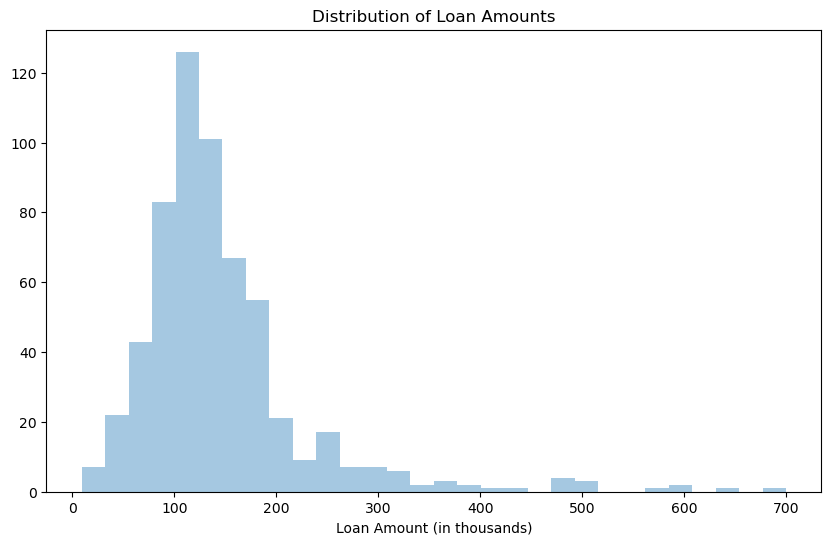

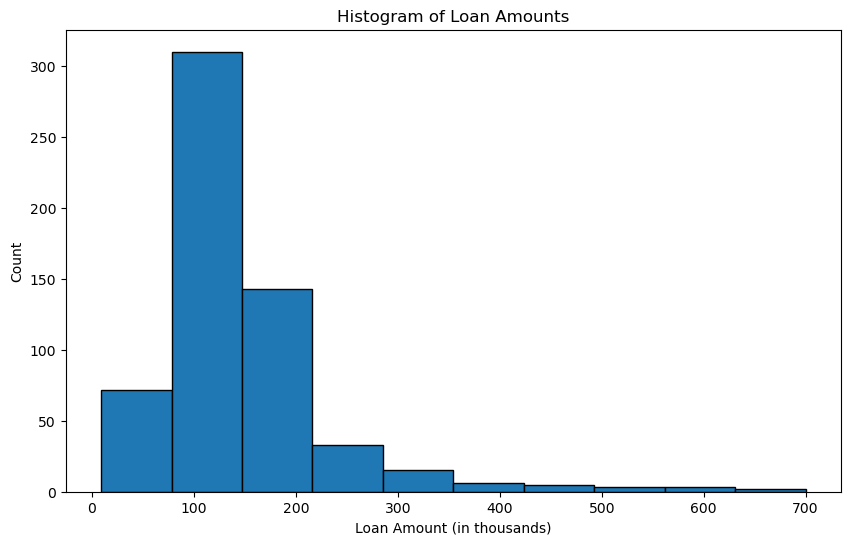

In [36]:
# a) Plot distribution using seaborn
plt.figure(figsize=(10, 6))
sns.distplot(df['LoanAmount'], kde=False, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in thousands)')
plt.show()
# Comment: Plots the distribution of loan amounts using seaborn.distplot

# b) Plot histogram using matplotlib, specifying number of bins
plt.figure(figsize=(10, 6))
plt.hist(df['LoanAmount'], bins=10, edgecolor='black')
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Count')
plt.show()
# Comment: Plots a histogram of loan amounts with 10 bins using plt.hist

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [37]:
from scipy.stats import norm

In [38]:
# Calculate percentage of customers with income less than 2000 using scipy.stats.norm.cdf()
applicant_income = df['ApplicantIncome']
mean_income = applicant_income.mean()
std_income = applicant_income.std()

threshold = 2000
perc_under_2000 = norm.cdf(threshold, loc=mean_income, scale=std_income)

print(f"Mean monthly income: {mean_income:.2f}")
print(f"Standard deviation of income: {std_income:.2f}")
print(f"{perc_under_2000*100:.2f}% of customers have monthly income less than {threshold}")

Mean monthly income: 5403.46
Standard deviation of income: 6109.04
28.87% of customers have monthly income less than 2000


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

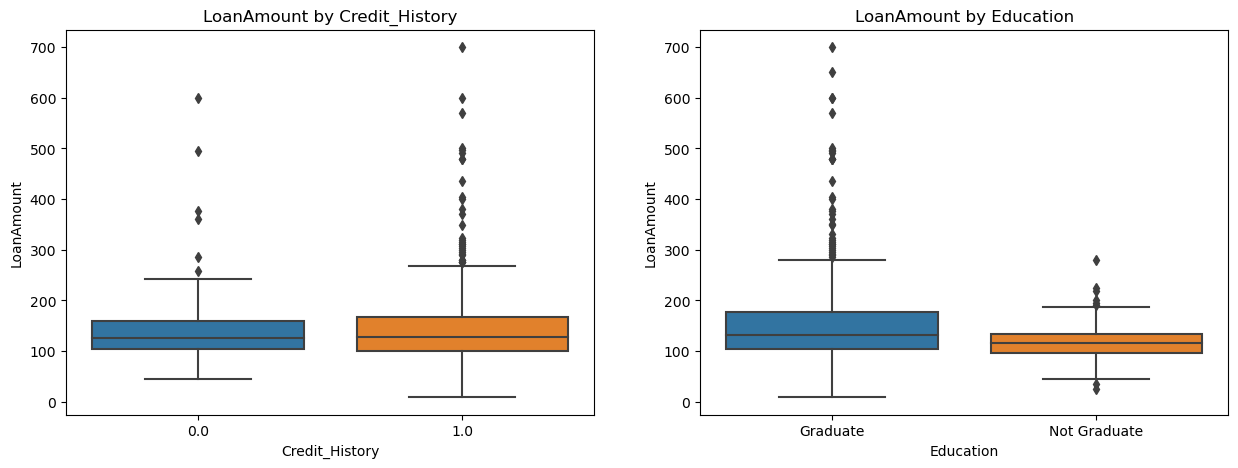

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot boxplot of LoanAmount by Credit_History
sns.boxplot(x='Credit_History', y='LoanAmount', data=df, ax=ax1)
ax1.set_title('LoanAmount by Credit_History')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('LoanAmount')

# Plot boxplot of LoanAmount by Education
sns.boxplot(x='Education', y='LoanAmount', data=df, ax=ax2)
ax2.set_title('LoanAmount by Education')
ax2.set_xlabel('Education')
ax2.set_ylabel('LoanAmount')

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [41]:
from scipy.stats import ttest_1samp,ttest_ind

In [50]:
# a) One sample t-test
# Null hypothesis: Mean loan amount is 130 thousand
# Alternative hypothesis: Mean loan amount is not 130 thousand
loan_amounts = df['LoanAmount']
t_stat, p_val = ttest_1samp(loan_amounts, 130)

print(f'One sample t-test results:')
print(f'Test statistic: {t_stat:.3f}')
print(f'p-value: {p_val:.4f}')

if p_val < 0.05:
   print('We reject the null hypothesis. The mean loan amount is significantly different from 130 thousand.')
else:
   print('We cannot reject the null hypothesis. The data is insufficient to conclude that the mean loan amount differs from 130 thousand.')

# b) Two sample t-test 
# Null hypothesis: Mean loan amounts for males and females are equal
# Alternative hypothesis: Mean loan amounts for males and females are different

male_loans = df[df['Gender'] == 'Male']['LoanAmount']
female_loans = df[df['Gender'] == 'Female']['LoanAmount']

t_stat, p_val = ttest_ind(male_loans, female_loans)

print(f'\nTwo sample t-test results:')
print(f'Test statistic: {t_stat:.3f}') 
print(f'p-value: {p_val:.4f}')

if p_val < 0.05:
   print('We reject the null hypothesis. The mean loan amounts for males and females are significantly different.')
else:
   print('We cannot reject the null hypothesis. The data is insufficient to conclude that the mean loan amounts differ between males and females.')

One sample t-test results:
Test statistic: nan
p-value: nan
We cannot reject the null hypothesis. The data is insufficient to conclude that the mean loan amount differs from 130 thousand.

Two sample t-test results:
Test statistic: nan
p-value: nan
We cannot reject the null hypothesis. The data is insufficient to conclude that the mean loan amounts differ between males and females.
